In [91]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
import time

# Import the time library and the datetime module from the datetime library 
from datetime import datetime

# Import linregress
from scipy.stats import linregress

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key




In [82]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [83]:
# We need to add the code that generates the latitudes and longitudes
#1. they need to be stored so that we can access them later
#2. Declare each array as a variable (arrays of longitude and latitude)
#3. We'll use the Zip() to pack the lats and lgns as pairs

In [84]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [85]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [86]:
# Use the print() function to display the latitude and longitude combinations. (index is 0 to 1)
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-73.64193440214878 -14.826590360087408
-36.060387118847586 70.78271023214063
-62.140494659174976 3.0350067415526496
29.997838118047312 21.592351438582085
6.186514085917793 74.29955523976517
50.23119810876415 -73.09049229968048
69.7077428489599 -83.85963322784114
-45.27957013201273 -89.63559317142794
-88.60626859614247 -143.23535121026475
72.40945919774376 142.60993232563612
23.03304747557766 5.609240006972755
-60.4401957552458 -168.38931188713184
69.71904963179355 139.57279703228454
-2.8103364268035023 167.4095487976403
-65.51443635685078 108.88664400003734
-50.333301644047964 -117.53978873393967
59.89684928754562 -50.032962850948735
74.70820729814702 -142.66806589956252
-82.79222579667987 107.96619938453767
-84.69363700437114 50.50185717541984
-50.94296237993988 168.598079101473
-84.17708854695739 -94.25467522165636
-54.910991069982636 83.2396282952659
-13.669979176042844 -124.18484987374786
-36.38703415983321 16.3121233758678
-7.234705749743398 -2.4012987755269535
-72.70154530254756 

In [87]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [88]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cape town za
mahebourg mu
hermanus za
awjilah ly
manadhoo mv
normandin ca
clyde river ca
castro cl
mataura pf
deputatskiy ru
arlit ne
vaini to
deputatskiy ru
tabiauea ki
albany au
rikitea pf
paamiut gl
aklavik ca
albany au
port alfred za
bluff nz
punta arenas cl
busselton au
rikitea pf
cape town za
jamestown sh
punta arenas cl
mataura pf
alofi nu
jamestown sh
bambous virieux mu
attawapiskat ca
changzhou cn
hilo us
bur gabo so
meyungs pw
ancud cl
butaritari ki
illoqqortoormiut gl
saint-philippe re
vaini to
rabo de peixe pt
tasiilaq gl
taolanaro mg
sinnamary gf
vung tau vn
alvorada br
kamenskoye ru
norman wells ca
mehamn no
grande prairie ca
lincoln us
qaanaaq gl
albany au
cape town za
cherskiy ru
miri my
albany au
tazovskiy ru
tiksi ru
barrow us
periyanegamam in
mar del plata ar
klaksvik fo
tasiilaq gl
jamestown sh
yellowknife ca
jamestown sh
amderma ru
husavik is
kutum sd
jamestown sh
qaanaaq gl
siteki sz
port alfred za
bedum nl
lebu cl
labuhan id
mataura pf
clyde river ca
taolanaro mg

cape town za
dikson ru
hermanus za
bredasdorp za
barrow us
amderma ru
torbay ca
trincomalee lk
tasiilaq gl
mar del plata ar
gat ly
nome us
kondoa tz
ushuaia ar
rikitea pf
port-cartier ca
porto novo cv
puerto ayora ec
jamestown sh
busselton au
rikitea pf
hermanus za
butaritari ki
nemuro jp
ilulissat gl
ushuaia ar
green river us
klaksvik fo
bathsheba bb
iqaluit ca
bluff nz
petropavlovsk-kamchatskiy ru
lolua tv
pangnirtung ca
halifax ca
mys shmidta ru
datong cn
hermanus za
bluff nz
rikitea pf
farcasa ro
grindavik is
te anau nz
ushuaia ar
haines junction ca
kapaa us
cape town za
albany au
mandurah au
haapiti pf
meulaboh id
bredasdorp za
saint-philippe re
provideniya ru
yuksekova tr
lompoc us
bluff nz
taolanaro mg
wolgast de
tomatlan mx
port alfred za
caramay ph
ilulissat gl
yellowknife ca
bluff nz
mataura pf
tuktoyaktuk ca
jamestown sh
hithadhoo mv
san quintin mx
saint-philippe re
klaksvik fo
cap-aux-meules ca
hermanus za
ushuaia ar
hithadhoo mv
busselton au
pemba mz
broome au
moissala td


In [89]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    
# Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        continue

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | awjilah
Processing Record 5 of Set 1 | manadhoo
Processing Record 6 of Set 1 | normandin
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | deputatskiy
Processing Record 11 of Set 1 | arlit
Processing Record 12 of Set 1 | vaini
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | paamiut
Processing Record 16 of Set 1 | aklavik
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | alofi
Processing Record 23 o

Processing Record 5 of Set 5 | manati
City not found. Skipping...
Processing Record 6 of Set 5 | san carlos de bariloche
Processing Record 7 of Set 5 | ribeira grande
Processing Record 8 of Set 5 | ndele
Processing Record 9 of Set 5 | dingle
Processing Record 10 of Set 5 | cidreira
Processing Record 11 of Set 5 | nova odesa
Processing Record 12 of Set 5 | kurud
Processing Record 13 of Set 5 | port elizabeth
Processing Record 14 of Set 5 | sandpoint
Processing Record 15 of Set 5 | lompoc
Processing Record 16 of Set 5 | monrovia
Processing Record 17 of Set 5 | santhia
Processing Record 18 of Set 5 | porto walter
Processing Record 19 of Set 5 | sabha
Processing Record 20 of Set 5 | wairoa
Processing Record 21 of Set 5 | fort stewart
Processing Record 22 of Set 5 | turukhansk
Processing Record 23 of Set 5 | susner
Processing Record 24 of Set 5 | guerrero negro
Processing Record 25 of Set 5 | harper
Processing Record 26 of Set 5 | nizhniy kuranakh
Processing Record 27 of Set 5 | kruisfontei

Processing Record 8 of Set 9 | porto novo
Processing Record 9 of Set 9 | nemuro
Processing Record 10 of Set 9 | ilulissat
Processing Record 11 of Set 9 | green river
Processing Record 12 of Set 9 | petropavlovsk-kamchatskiy
Processing Record 13 of Set 9 | halifax
Processing Record 14 of Set 9 | datong
Processing Record 15 of Set 9 | farcasa
Processing Record 16 of Set 9 | mandurah
Processing Record 17 of Set 9 | haapiti
Processing Record 18 of Set 9 | meulaboh
Processing Record 19 of Set 9 | provideniya
Processing Record 20 of Set 9 | yuksekova
Processing Record 21 of Set 9 | wolgast
Processing Record 22 of Set 9 | caramay
Processing Record 23 of Set 9 | cap-aux-meules
Processing Record 24 of Set 9 | pemba
Processing Record 25 of Set 9 | broome
Processing Record 26 of Set 9 | moissala
City not found. Skipping...
Processing Record 27 of Set 9 | ahipara
Processing Record 28 of Set 9 | yerbogachen
Processing Record 29 of Set 9 | alto longa
Processing Record 30 of Set 9 | ramanuj ganj
Proc

In [92]:
# Number of cities in the city_data array of dictionaries
len(city_data)

549

In [93]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,61.38,86,45,1.99,ZA,2022-05-23 01:12:02
1,Mahebourg,-20.4081,57.7000,73.69,78,40,6.91,MU,2022-05-23 01:12:43
2,Hermanus,-34.4187,19.2345,58.80,82,29,7.45,ZA,2022-05-23 01:12:44
3,Awjilah,29.1081,21.2869,68.13,32,0,5.53,LY,2022-05-23 01:12:44
4,Manadhoo,5.7667,73.3833,83.21,77,94,14.97,MV,2022-05-23 01:12:44


In [94]:
#Plot the Data
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

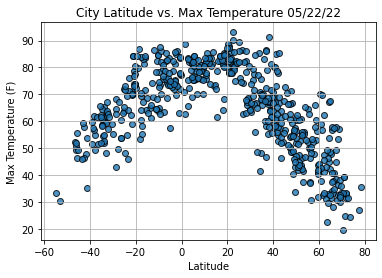

In [95]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

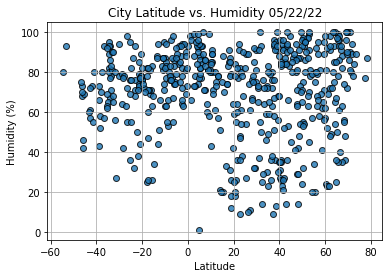

In [96]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

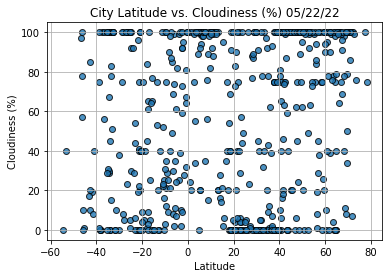

In [97]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

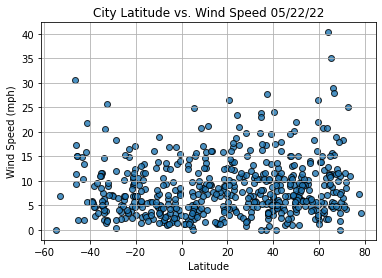

In [98]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [99]:
#Linear Regression

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [100]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Awjilah,29.1081,21.2869,68.13,32,0,5.53,LY,2022-05-23 01:12:44
4,Manadhoo,5.7667,73.3833,83.21,77,94,14.97,MV,2022-05-23 01:12:44
5,Normandin,48.8333,-72.5321,40.39,87,100,11.21,CA,2022-05-23 01:12:45
6,Clyde River,70.4692,-68.5914,19.63,86,100,18.41,CA,2022-05-23 01:12:45
9,Deputatskiy,69.3000,139.9000,32.59,96,8,1.83,RU,2022-05-23 01:12:47
...,...,...,...,...,...,...,...,...,...
542,Bilma,18.6853,12.9164,84.43,12,91,3.65,NE,2022-05-23 01:28:10
544,Kapuskasing,49.4169,-82.4331,44.69,70,75,5.75,CA,2022-05-23 01:28:11
546,Atasu,48.6814,71.6433,48.85,48,0,7.05,KZ,2022-05-23 01:28:12
547,Vestmannaeyjar,63.4427,-20.2734,49.17,80,4,7.18,IS,2022-05-23 01:28:13


In [101]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Awjilah,29.1081,21.2869,68.13,32,0,5.53,LY,2022-05-23 01:12:44
4,Manadhoo,5.7667,73.3833,83.21,77,94,14.97,MV,2022-05-23 01:12:44
5,Normandin,48.8333,-72.5321,40.39,87,100,11.21,CA,2022-05-23 01:12:45
6,Clyde River,70.4692,-68.5914,19.63,86,100,18.41,CA,2022-05-23 01:12:45
9,Deputatskiy,69.3000,139.9000,32.59,96,8,1.83,RU,2022-05-23 01:12:47


In [102]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

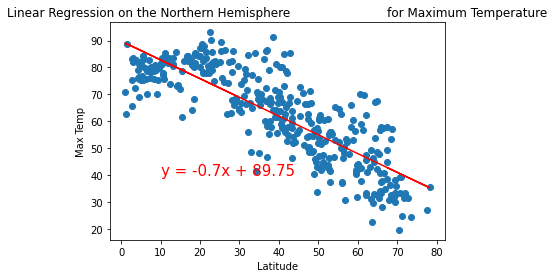

In [104]:
# Linear regression on the Northern Hemisphere between Latitude and Max Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

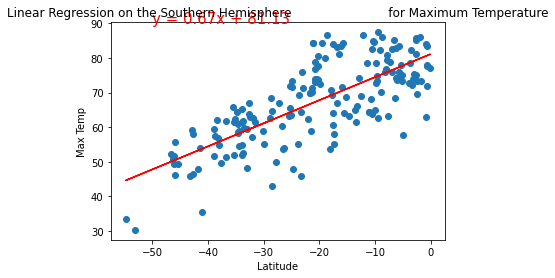

In [105]:
# Linear regression on the Southern Hemisphere between Latitude and Max Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

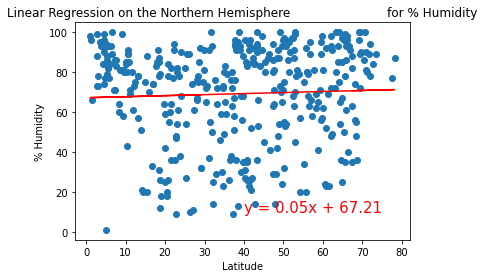

In [106]:
# Linear regression on the Northern Hemisphere between Latitude and % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

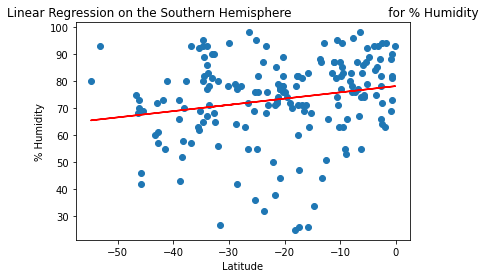

In [107]:
# Linear regression on the Southern Hemisphere between Latitude and % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

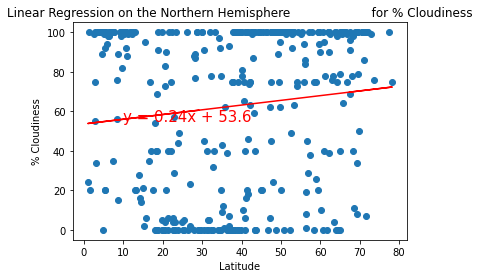

In [109]:
# Linear regression on the Northern Hemisphere between Latitude and cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

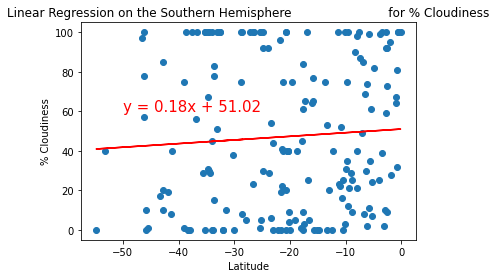

In [110]:
# Linear regression on the Southern Hemisphere between Latitude and cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

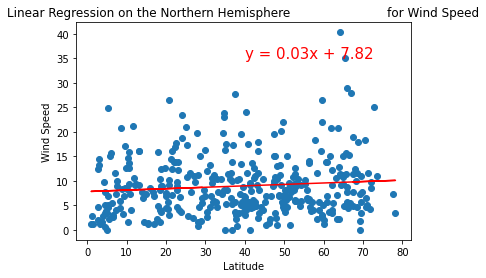

In [111]:
# Linear regression on the Northern Hemisphere between Latitude and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

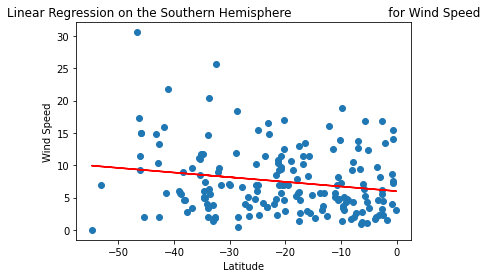

In [112]:
# Linear regression on the Southern Hemisphere between Latitude and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))